The goal of this notebook is to take our dataset and create a zip containing the images and a csv file containing the labels in relation to the images. The labels are 4 numbers for bounding boxes.

The zip is then to be sent to google drive from where we will be able to use it inside our google colab notebook.

In [44]:
from os import path, walk
from matplotlib import pyplot as plt
from matplotlib import patches
import random as rd
from tqdm import tqdm
import pandas as pd

%run '../alprLib/PlateBoundingBox.py'

In [45]:
DATASET_PATH = "../eu_dataset"
ANNOTATIONS_PATH = path.join(DATASET_PATH, "annots")
IMAGES_PATH = path.join(DATASET_PATH, "images")

Image shape: (720, 1280, 4)


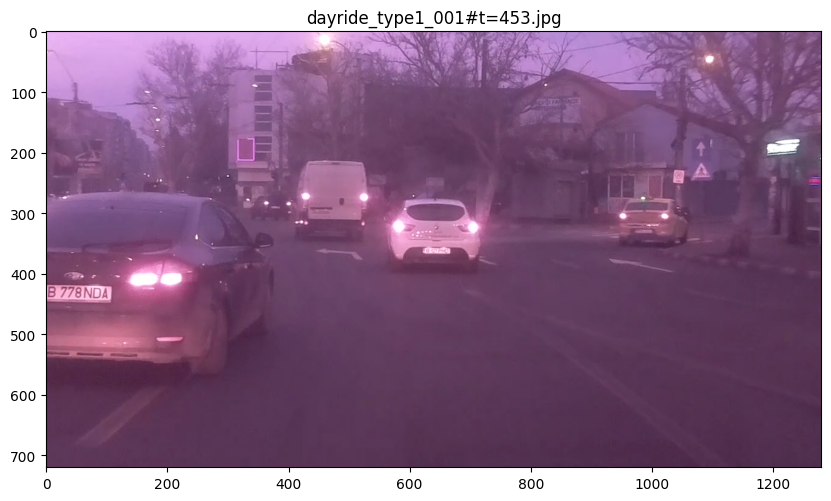

In [46]:
image_filenames = list(walk(IMAGES_PATH))
image_filename = rd.choice(image_filenames[0][2])
image_path = path.join(image_filenames[0][0], image_filename)
img = plt.imread(image_path)
fig, ax = plt.subplots(figsize=(10,8))
ax.set_title(image_filename)
ax.imshow(img)
print('Image shape: {}'.format(img.shape))

In [47]:
annotation = image_filename.split('.')[0] + '.xml'
annotation_path = path.join(ANNOTATIONS_PATH, annotation)
print('Annotation path: {}'.format(annotation_path))

with open(annotation_path, 'r') as f:
    print(f.read())


Annotation path: ../eu_dataset/annots/dayride_type1_001#t=453.xml
<annotation verified="yes">
    <folder>Annotation</folder>
    <filename>dayride_type1_001.mp4#t=453.jpg</filename>
    <path>license-plate-detector-PascalVOC-export/Annotations/dayride_type1_001.mp4#t=453.jpg</path>
    <source>
        <database>Unknown</database>
    </source>
    <size>
        <width>1280</width>
        <height>720</height>
        <depth>3</depth>
    </size>
    <segmented>0</segmented>
    <object>
    <name>license-plate</name>
    <pose>Unspecified</pose>
    <truncated>0</truncated>
    <difficult>0</difficult>
    <bndbox>
        <xmin>0</xmin>
        <ymin>413.6065573770491</ymin>
        <xmax>113.59200922013062</xmax>
        <ymax>451.9672131147541</ymax>
    </bndbox>
</object><object>
    <name>license-plate</name>
    <pose>Unspecified</pose>
    <truncated>0</truncated>
    <difficult>0</difficult>
    <bndbox>
        <xmin>618.6092969650404</xmin>
        <ymin>355.5737704918031

In [48]:
plates = PlateBoundingBox.load_from_xml(annotation_path)
for plate in plates:
    plate.describe()

PlateBoundingBox
xmin: 0
ymin: 413
xmax: 113
ymax: 451
width: 113
height: 38
width01: 0.08828125
height01: 0.05277777777777778
center01: (0.044140625, 0.6)
center: (56.5, 432.0)
area: 4294

PlateBoundingBox
xmin: 618
ymin: 355
xmax: 671
ymax: 370
width: 53
height: 15
width01: 0.04140625
height01: 0.020833333333333332
center01: (0.503515625, 0.5034722222222222)
center: (644.5, 362.5)
area: 795



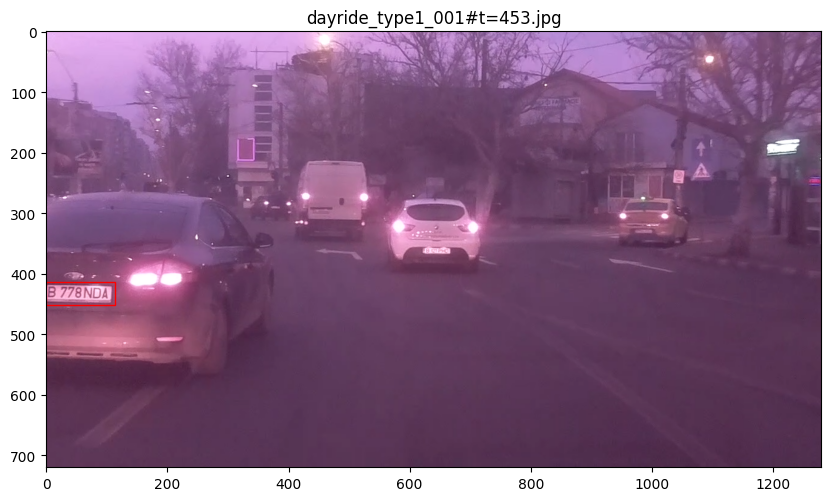

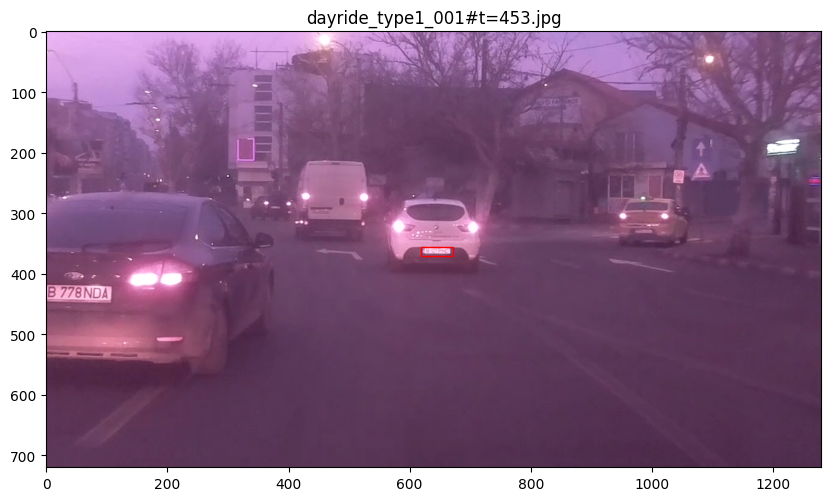

In [49]:
for plate in plates:
    fig, ax = plt.subplots(figsize=(10,8))
    ax.set_title(image_filename)
    ax.imshow(img)
    rect = patches.Rectangle((plate.xmin, plate.ymin), plate.width, plate.height, linewidth=1, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

In [50]:
# create a dataframe that holds the bounding box information for each image
df = pd.DataFrame(columns=['filename', 'w', 'h', 'xc', 'yc'])
for filename in tqdm(image_filenames[0][2]):
    annotation = filename.split('.')[0] + '.xml'
    annotation_path = path.join(ANNOTATIONS_PATH, annotation)
    plates = PlateBoundingBox.load_from_xml(annotation_path)
    for plate in plates:
        new_row = pd.DataFrame({
            'filename': filename, 
            'w': plate.width01,
            'h': plate.height01,
            'xc': plate.center01[0],
            'yc': plate.center01[1],
        }, index=[0])
        df = pd.concat([df, new_row], ignore_index=True)

df.head()

100%|██████████| 534/534 [00:00<00:00, 1906.08it/s]


,filename,w,h,xc,yc
0,dayride_type1_001#t=462.jpg,0.060156,0.026389,0.519141,0.509028
1,dayride_type1_001#t=1058.jpg,0.142187,0.062500,0.484375,0.849306
2,dayride_type1_001#t=1172.jpg,0.053125,0.026389,0.714844,0.553472
3,dayride_type1_001#t=1392.jpg,0.149219,0.066667,0.451953,0.843056
4,dayride_type1_001#t=891.jpg,0.185938,0.079167,0.367188,0.695139


In [52]:
# zip ./archive/images with the dataframe exported as csv

# export the dataframe as csv
df.to_csv('labels.csv', index=False)

# zip the images and the csv file (make sure all files are copied to the root of the zip file)
!zip -j dataset.zip ../eu_dataset/images_resized/* labels.csv

# remove the csv file
!rm labels.csv

  adding: dayride_type1_001#t=1054.jpg (deflated 1%)
  adding: dayride_type1_001#t=1055.jpg (deflated 2%)
  adding: dayride_type1_001#t=1056.jpg (deflated 1%)
  adding: dayride_type1_001#t=1057.jpg (deflated 1%)
  adding: dayride_type1_001#t=1058.jpg (deflated 1%)
  adding: dayride_type1_001#t=1059.jpg (deflated 1%)
  adding: dayride_type1_001#t=1060.jpg (deflated 1%)
  adding: dayride_type1_001#t=1062.jpg (deflated 1%)
  adding: dayride_type1_001#t=1063.jpg (deflated 1%)
  adding: dayride_type1_001#t=1071.jpg (deflated 1%)
  adding: dayride_type1_001#t=1072.jpg (deflated 1%)
  adding: dayride_type1_001#t=1073.jpg (deflated 1%)
  adding: dayride_type1_001#t=1074.jpg (deflated 1%)
  adding: dayride_type1_001#t=1075.jpg (deflated 1%)
  adding: dayride_type1_001#t=1077.jpg (deflated 1%)
  adding: dayride_type1_001#t=1078.jpg (deflated 1%)
  adding: dayride_type1_001#t=1082.jpg (deflated 2%)
  adding: dayride_type1_001#t=1083.jpg (deflated 2%)
  adding: dayride_type1_001#t=1084.jpg (deflat